In [92]:
import matplotlib.pyplot as plt
import numpy as np
import random

In [93]:
# Function to check if a degree sequence is graphical
def is_graphical(seq):
    # Sort the sequence in non-increasing order
    seq = sorted(seq, reverse=True)
    # Check if the sum of the sequence is even
    if sum(seq) % 2 != 0:
        return False
    # Generate the Havel-Hakimi graph
    while seq:
        # Remove the first element of the sequence
        d = seq.pop(0)
        # Check if the sequence is too short
        if len(seq) < d:
            return False
        # Subtract 1 from the first d elements of the sequence
        for i in range(d):
            seq[i] -= 1
        # Remove any zeros from the sequence
        seq = [x for x in seq if x != 0]
        # Sort the sequence in non-increasing order
        seq = sorted(seq, reverse=True)
    # If the sequence can be reduced to an empty sequence, then it is graphical
    return True

In [94]:
def generate_degree_sequence(p, n):
    # Create empty degree sequence
    degree_sequence = [0] * n

    # Generate degree for each node
    for i in range(n):
        r = random.random()
        for j in range(len(p)):
            if r < sum(p[:j+1]):
                degree_sequence[i] = j
                break

    # Check if the degree sequence is valid
    if not is_graphical(degree_sequence):
        # If not valid, try again recursively
        return generate_degree_sequence(p, n)

    return degree_sequence

In [ ]:
def compare_degree_distributions(array1, array2):
    # Calculate Euclidean distance
    euclidean_distance = np.linalg.norm(array1 - array2)

    # Calculate maximum possible distance
    max_distance = np.linalg.norm(np.ones_like(array1) - np.zeros_like(array2))

    # Normalize Euclidean distance to obtain similarity score
    similarity_score = 1 - (euclidean_distance / max_distance)

    return similarity_score

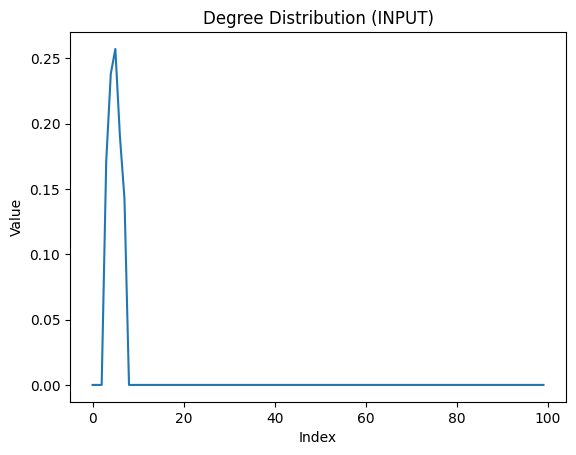

In [95]:
# Given Degree Distribution as INPUT
data = [0.0, 0.0, 0.0, 0.17142857142857143, 0.23809523809523808, 0.2571428571428571, 0.19047619047619047, 0.14285714285714285, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

'''Here the given dataset is plotted in a graph where x axis represents the degree of a node, and y axis represents the
probablity of a node having that degree'''

# Generate x-axis values based on the array index
x_axis = range(len(data))

# Plot the graph
plt.plot(x_axis, data)

# Add labels and title
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Degree Distribution (INPUT)')

# Display the graph
plt.show()

In [96]:
# Generate a Random Valid Degree Sequence from the Given Degree Distribution INPUT 
degree_sequence = generate_degree_sequence(data, len(data))
#degree_sequence = [6, 4, 5, 7, 3, 4, 5, 3, 5, 6, 4, 3, 6, 5, 4, 7, 5, 3, 4, 6, 5, 3, 5, 4, 6, 5, 7, 4, 6, 5, 4, 3, 7, 5, 4, 6, 5, 7, 3, 4, 5, 6, 3, 4, 7, 5, 6, 4, 3, 5, 6, 4, 7, 5, 3, 6, 4, 5, 7, 4, 6, 3, 5, 7, 4, 6, 5, 3, 4, 7, 5, 3, 6, 4, 5, 6, 3, 4, 7, 5, 4, 6, 3, 5, 4, 6, 5, 7, 3, 4, 5, 6, 3, 7, 4, 5, 6, 4, 3, 7, 5, 6, 4, 5, 7]
degree_sequence.sort(reverse=True)
print(degree_sequence)

[7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]


In [97]:
'''Calculating new degree distribution array from the generated valid random degree sequence'''
# Example degree sequence array
size=len(degree_sequence)
# Initialize an array to store the degree distribution
degree_distribution = np.zeros(size)

# Calculate the degree distribution
for degree in degree_sequence:
    if degree < size:
        degree_distribution[degree] += 1

# Normalize the degree distribution to get probabilities
degree_distribution = degree_distribution / len(degree_sequence)

# Print the degree distribution array
output = ", ".join(str(value) for value in degree_distribution)
print(f"[{output}]")


[0.0, 0.0, 0.0, 0.13, 0.32, 0.26, 0.18, 0.11, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


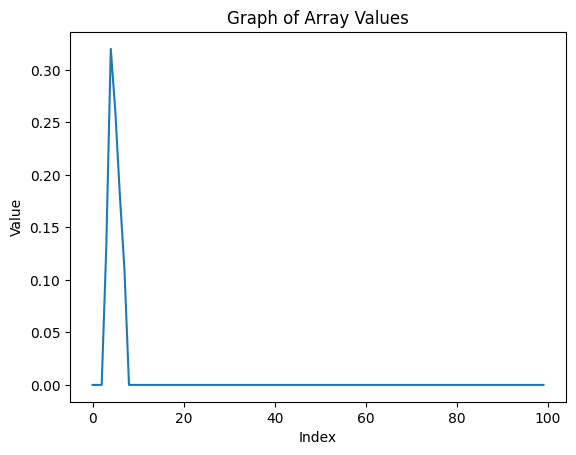

In [98]:
'''Here the calculated degree distribution is plotted in a graph where x axis represents the degree of a node, 
and y axis represents the probablity of a node having that degree'''
# Generate x-axis values based on the array index
x_axis = range(len(degree_distribution))

# Plot the graph
plt.plot(x_axis, degree_distribution)

# Add labels and title
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Degree Distribution (Generated)')

# Display the graph
plt.show()

In [99]:
'''Calculating Similarity score between the given degree sequence and generated degree sequence'''

similarity_score = compare_degree_distributions(data,degree_distribution)
print(f"Similarity Score: {similarity_score*100}%")

Similarity Score: 99.01907073536252%
